<h2>STINTSY Machine Project</h2>

Group Doc OCT (Patrick Ong, Russel Campol, Miko Tansingco)

<h4>Library Importing</h4>

In [20]:
import matplotlib.image as mpimg
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
from random import *
#imports for image reading
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
#imports for label encoding for classes
from sklearn import preprocessing

<h3>Encode labels

<h4>Exploratory Data Analysis</h4>

1. Analysis of images

In [21]:
data = pd.read_csv('labels.csv')

<h4> encoding of labels

In [22]:
# label_enc = preprocessing.LabelEncoder()
# label_enc.fit(data["breed"])

LabelEncoder()

In [23]:
# label_enc.transform(data["breed"])

array([19, 37, 85, ...,  3, 75, 28])

In [24]:
#show encoded versions of all classes
# print("Original labels:", label_enc.classes_, "\n")

# print("Mapping from nominal to numerical labels:")
# print(dict(zip(label_enc.classes_,label_enc.transform(label_enc.classes_))))

Original labels: ['affenpinscher' 'afghan_hound' 'african_hunting_dog' 'airedale'
 'american_staffordshire_terrier' 'appenzeller' 'australian_terrier'
 'basenji' 'basset' 'beagle' 'bedlington_terrier' 'bernese_mountain_dog'
 'black-and-tan_coonhound' 'blenheim_spaniel' 'bloodhound' 'bluetick'
 'border_collie' 'border_terrier' 'borzoi' 'boston_bull'
 'bouvier_des_flandres' 'boxer' 'brabancon_griffon' 'briard'
 'brittany_spaniel' 'bull_mastiff' 'cairn' 'cardigan'
 'chesapeake_bay_retriever' 'chihuahua' 'chow' 'clumber' 'cocker_spaniel'
 'collie' 'curly-coated_retriever' 'dandie_dinmont' 'dhole' 'dingo'
 'doberman' 'english_foxhound' 'english_setter' 'english_springer'
 'entlebucher' 'eskimo_dog' 'flat-coated_retriever' 'french_bulldog'
 'german_shepherd' 'german_short-haired_pointer' 'giant_schnauzer'
 'golden_retriever' 'gordon_setter' 'great_dane' 'great_pyrenees'
 'greater_swiss_mountain_dog' 'groenendael' 'ibizan_hound' 'irish_setter'
 'irish_terrier' 'irish_water_spaniel' 'irish_wol

In [25]:
# data["breed"]=label_enc.transform(data["breed"])


In [26]:
# data

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,19
1,001513dfcb2ffafc82cccf4d8bbaba97,37
2,001cdf01b096e06d78e9e5112d419397,85
3,00214f311d5d2247d5dfe4fe24b2303d,15
4,0021f9ceb3235effd7fcde7f7538ed62,49
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,18
10218,ffd3f636f7f379c51ba3648a9ff8254f,35
10219,ffe2ca6c940cddfee68fa3cc6c63213f,3
10220,ffe5f6d8e2bff356e9482a80a6e29aac,75


<h4>alternative way of opening images with progress bar and resizing of all images to make it equal

In [17]:
# train_img = []
# for img_name in tqdm(data['id']):
#     # defining the image path
#     image_path = 'train/' + img_name + '.jpg'
#     # reading the image
#     img = imread(image_path)
#     # normalizing the pixel values
#     img = img/255
#     # resizing the image to (224,224,3)
#     img = resize(img, output_shape=(224,224,3), mode='constant', anti_aliasing=True)
#     # converting the type of pixel to float 32
#     img = img.astype('float32')
#     # appending the image into the list
#     train_img.append(img)

# converting the list to numpy array
# X = np.array(train_img)
# X.shape

100%|████████████████████████████████████████████████████████████████████████████| 10222/10222 [04:52<00:00, 34.93it/s]


(10222, 224, 224, 3)

airedale
09d5ac8026b8a7f7d1acae244765fe24


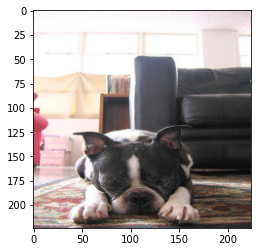

In [18]:
# index = np.random.randint(0,len(data))
# print(data['breed'][index])
# print(data['id'][index])
# plt.imshow(X[index])

In [2]:
def loadDataFromFolder(folder):
    images = []
    for filename in os.listdir(folder):
        img = mpimg.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [3]:
images = loadDataFromFolder('train')

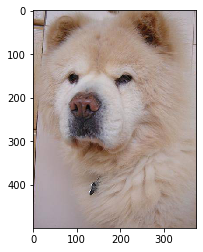

In [21]:
ind = randint(0,len(images))
plt.imshow(images[ind])

2. Analysis of labels

In [28]:
labels = pd.read_csv('labels.csv')
labels

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [100]:
breed_count = labels.groupby('breed').count().sort_values('id')
breed_count

,id
breed,
briard,66
eskimo_dog,66
komondor,67
brabancon_griffon,67
golden_retriever,67
...,...
bernese_mountain_dog,114
entlebucher,115
afghan_hound,116


In [111]:
breed_count.describe()

,id
count,120.000000
mean,85.183333
std,13.298122
min,66.000000
25%,75.000000
50%,82.000000
75%,91.250000
max,126.000000
